In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [170]:
path = '../Datos LICD.xlsx'

df = pd.read_excel(path)

df

,Codigo,Codigos,Codigo actual,Código \ninterno,Edad Dx,IMC,Comorbilidades,HTA,DM2,RAN,...,C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",n-3 (EPA + DHA),RELACIÓN\nn-6/n-3,RELACIÓN\n ARA/EPA+DHA
0,P-CS-1,SC-CS-1,NA-03,1,40,35.99,0,0,0,5240.0,...,2.169641,1.099265,59.615691,22.914686,17.469623,11.973153,5.496470,NaN,2.178335,NaN
1,P-CS-2,SC-CS-2,NA-04,2,41,24.40,0,0,0,NaN,...,2.984917,1.579496,52.307945,22.652729,25.039326,18.189058,6.850268,NaN,2.655233,NaN
2,P-CS-3,SC-CS-3,NA-05,3,66,29.76,1,1,0,4090.0,...,4.731568,4.143346,52.302080,13.564017,34.133904,24.940245,9.193659,NaN,2.712766,NaN
3,P-CS-5,SC-CS-5,NA-08,4,60,24.78,1,1,0,3980.0,...,0.809478,1.788759,61.588986,17.076779,18.396667,13.490231,4.906436,NaN,2.749497,NaN
4,P-CS-7,SC-CS-7,NA-09,5,53,26.81,1,0,0,NaN,...,1.663650,3.068574,60.603992,21.144460,18.251548,13.519325,4.732224,NaN,2.856865,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NA-46,73,53,30.27,0,0,0,NaN,...,0.278146,0.785157,52.397561,10.475878,37.126561,34.334227,2.792334,NaN,12.295890,NaN
73,NaN,RE bajo,NA-47,74,68,25.88,0,0,0,3600.0,...,0.503820,0.540800,54.992366,19.914015,25.093619,23.284311,1.809308,NaN,12.869178,NaN
74,NaN,NaN,NA-48,75,78,28.60,1,1,0,NaN,...,0.661364,0.879403,51.054557,19.231738,29.713705,27.866271,1.847434,NaN,15.083770,NaN
75,NaN,NaN,NA-49,76,61,21.74,1,0,0,NaN,...,0.492237,0.498309,51.048423,20.998756,27.952821,26.229994,1.722827,NaN,15.224970,NaN


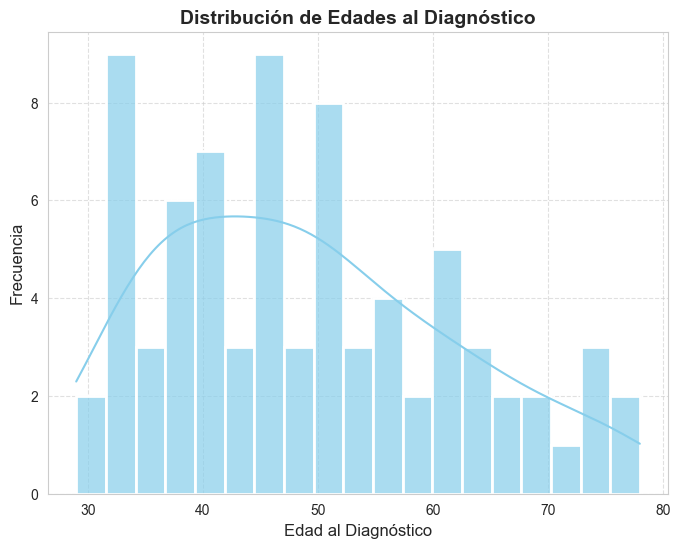

In [171]:
# Establecer un estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de densidad con mejoras estéticas
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Edad Dx', fill=True, color='skyblue', alpha=0.7, linewidth=2, kde=True, bins=19, stat='count')
plt.title('Distribución de Edades al Diagnóstico', fontsize=14, fontweight='bold')
plt.xlabel('Edad al Diagnóstico', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


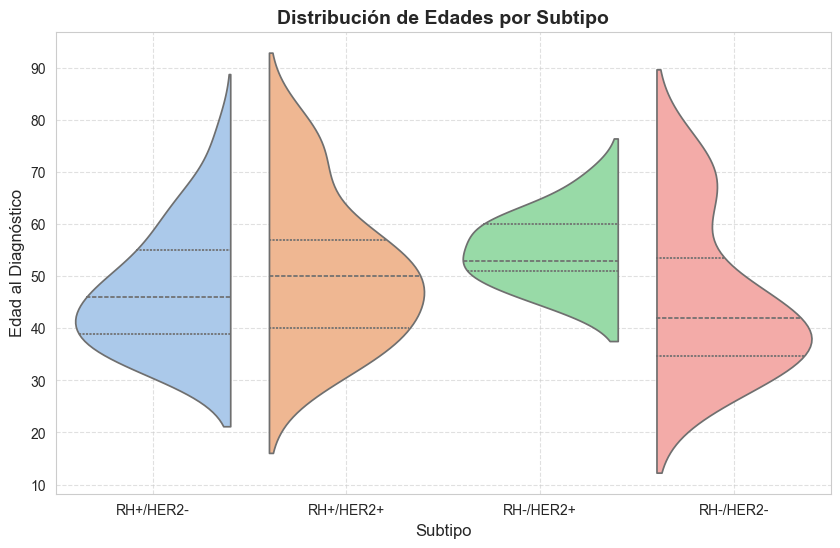

In [172]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4', y='Edad Dx', palette='pastel',
               hue='Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4', split=True, inner='quartile', legend=False)
plt.title('Distribución de Edades por Subtipo', fontsize=14, fontweight='bold')
plt.xlabel('Subtipo', fontsize=12)
plt.ylabel('Edad al Diagnóstico', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['RH+/HER2-', 'RH+/HER2+', 'RH-/HER2+', 'RH-/HER2-'], fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

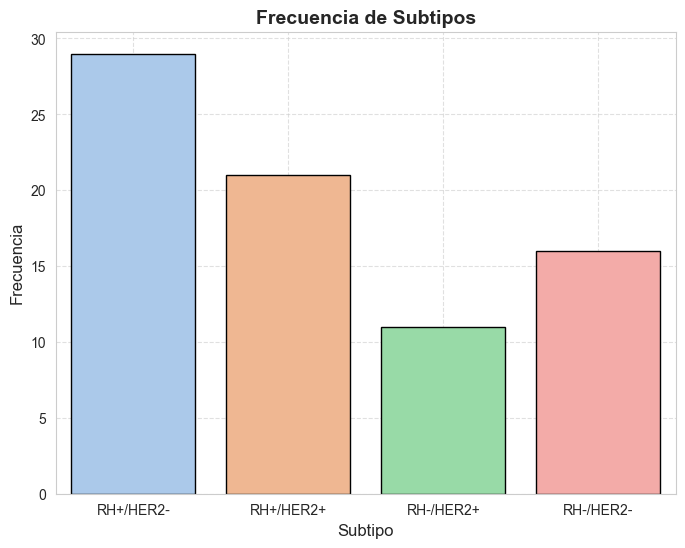

In [173]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4', palette='pastel',
              hue='Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4', legend=False, edgecolor='black')


plt.title('Frecuencia de Subtipos', fontsize=14, fontweight='bold')
plt.xlabel('Subtipo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(ticks=[0, 1, 2, 3], labels=['RH+/HER2-', 'RH+/HER2+', 'RH-/HER2+', 'RH-/HER2-'], fontsize=10)
plt.show()

In [175]:
df.isna().sum()[df.isna().sum() > 0]

Codigo                                                               58
Codigos                                                              38
IMC                                                                   2
RAN                                                                  20
RAL                                                                  20
RAN/RAL                                                              77
GH core                                                              12
GH bp                                                                47
KI67 core (%)                                                         2
KI67 biopsia (%)                                                     52
LN (Si=1; No=0)                                                       1
Etapa                                                                 2
RCB cat                                                              15
Score RCB                                                       

In [ ]:
col = ['Codigo ', 'Codigos', 'Codigo actual', 'Código \ninterno', 'IMC', 'RAN', 'RAL', 'RAN/RAL', 'GrupoRH+1 RH-0',
       'subtipo TN con RE<10', 'GH core', 'GH bp', 'KI67 core (%)', 'KI67 biopsia (%)', 'LN (Si=1; No=0)', 'Etapa',
       'RCB cat', 'Score RCB', 'RPC (1=Sí; 0=No)', 'Abs. Corregida', 'Prot. Carbonilada \n(nmol/ml)', 'Contenido de Carbonilos (nmol/mg)',
       '*La corrección por proteínas es opcional\n(Destacada en amarillo)', 'TBARS MDA (µM)', 'n-3 (EPA + DHA)', 'RELACIÓN\n ARA/EPA+DHA']

In [168]:
df = df.drop(columns=col, errors='ignore')

df

,Edad Dx,Comorbilidades,HTA,DM2,Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4,Abs Muestra,Abs Control,Proteínas totales\n(mg/ml),TBARS Abs,isoprostanos F8 pg/mL,...,C18:3n3 (a-linolenic),C20:4n6 (arachidonic),C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",RELACIÓN\nn-6/n-3
0,40,0,0,0,2,0.1382,0.0952,728.005886,0.0718,37.139994,...,2.227564,5.043372,2.169641,1.099265,59.615691,22.914686,17.469623,11.973153,5.496470,2.178335
1,41,0,0,0,1,0.1450,0.0988,674.069071,0.0618,51.400797,...,2.285854,6.373311,2.984917,1.579496,52.307945,22.652729,25.039326,18.189058,6.850268,2.655233
2,66,1,1,0,2,0.1768,0.1006,667.242351,0.1570,57.901621,...,0.318746,9.930977,4.731568,4.143346,52.302080,13.564017,34.133904,24.940245,9.193659,2.712766
3,60,1,1,0,3,0.1562,0.1106,657.566424,0.0612,54.367778,...,2.308200,7.104313,0.809478,1.788759,61.588986,17.076779,18.396667,13.490231,4.906436,2.749497
4,53,1,0,0,2,0.1217,0.0998,650.993599,0.0784,70.639224,...,0.000000,12.578260,1.663650,3.068574,60.603992,21.144460,18.251548,13.519325,4.732224,2.856865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,53,0,0,0,3,0.1661,0.1123,656.691948,0.0759,32.801779,...,1.729031,11.647535,0.278146,0.785157,52.397561,10.475878,37.126561,34.334227,2.792334,12.295890
73,68,0,0,0,1,0.2647,0.1138,658.525576,0.1439,43.260225,...,0.764689,6.003159,0.503820,0.540800,54.992366,19.914015,25.093619,23.284311,1.809308,12.869178
74,78,1,1,0,2,0.1907,0.1031,598.185154,0.0729,68.644283,...,0.306667,6.410781,0.661364,0.879403,51.054557,19.231738,29.713705,27.866271,1.847434,15.083770
75,61,1,0,0,3,0.3324,0.1021,603.065456,0.0728,56.863142,...,0.732282,11.371463,0.492237,0.498309,51.048423,20.998756,27.952821,26.229994,1.722827,15.224970


In [134]:
df.isna().sum()

Edad Dx                                                          0
Comorbilidades                                                   0
HTA                                                              0
DM2                                                              0
Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4    0
Abs Muestra                                                      0
Abs Control                                                      0
Proteínas totales\n(mg/ml)                                       0
TBARS Abs                                                        0
isoprostanos F8 pg/mL                                            0
C14:0 (myristic)                                                 0
C16:0 (palmitic)                                                 0
C16:1 (palmitoleic)                                              0
C17:0 (heptadecanoic)                                            0
C18:0 (stearic)                                               

In [135]:
# Cambiar los valores en la columna específica
data = df.copy()

# data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = df['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in [2, 3] else 2)



data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].value_counts()

Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4
1    29
2    21
4    16
3    11
Name: count, dtype: int64

In [136]:
data.describe()

,Edad Dx,Comorbilidades,HTA,DM2,Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4,Abs Muestra,Abs Control,Proteínas totales\n(mg/ml),TBARS Abs,isoprostanos F8 pg/mL,...,C18:3n3 (a-linolenic),C20:4n6 (arachidonic),C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",RELACIÓN\nn-6/n-3
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,49.090909,0.519481,0.194805,0.064935,2.181818,0.182368,0.10244,604.937906,0.097163,54.615402,...,1.305253,7.094303,0.983839,1.599682,54.174859,21.272713,24.514277,20.625503,3.888775,6.094066
std,12.505979,0.502897,0.398648,0.248027,1.155391,0.035893,0.00930,64.410261,0.025997,14.916942,...,0.840916,2.094360,0.686809,0.807020,5.582308,4.360931,5.421116,5.116761,1.455308,2.924931
min,29.000000,0.000000,0.000000,0.000000,1.000000,0.121700,0.09120,477.560807,0.056400,19.792642,...,0.000000,1.200689,0.235713,0.150114,36.572590,9.516010,15.620149,11.973153,1.623755,2.178335
25%,39.000000,0.000000,0.000000,0.000000,1.000000,0.157000,0.09740,547.746375,0.078180,47.386227,...,0.618742,5.844828,0.556231,0.925649,50.440123,18.228510,20.736577,17.429776,2.855488,4.235137
50%,47.000000,1.000000,0.000000,0.000000,2.000000,0.176800,0.10020,603.065456,0.089800,56.015619,...,1.168303,6.904169,0.847315,1.503729,54.429357,20.772073,24.212231,20.250199,3.867510,5.569583
75%,58.000000,1.000000,0.000000,0.000000,3.000000,0.195100,0.10400,657.566424,0.111600,62.112315,...,1.947856,8.591788,1.140042,2.140888,58.381324,24.480770,27.068002,22.488947,4.840773,6.943478
max,78.000000,1.000000,1.000000,1.000000,4.000000,0.332400,0.14740,792.352067,0.164500,124.925500,...,3.815685,12.578260,4.731568,4.143346,66.151959,31.841598,43.806776,39.224649,9.193659,15.558420


C:\Users\jor_x\AppData\Local\Temp\ipykernel_27952\2726390365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_data, x='Columnas', y='Correlación', palette='Blues_d', edgecolor='black')


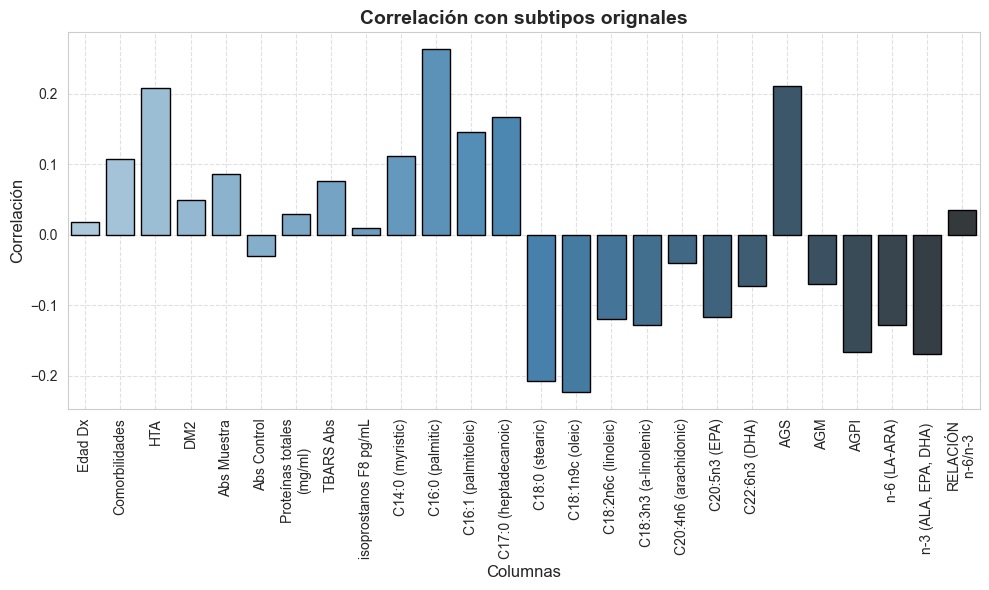

In [147]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()


correlation_data = correlation_matrix['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].drop(['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']).reset_index()
correlation_data.columns = ['Columnas', 'Correlación']

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_data, x='Columnas', y='Correlación', palette='Blues_d', edgecolor='black')
plt.title('Correlación con subtipos orignales', fontsize=14, fontweight='bold')
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Correlación', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\jor_x\AppData\Local\Temp\ipykernel_27952\2541525652.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_data, x='Columnas', y='Correlación', palette='Blues_d', edgecolor='black')


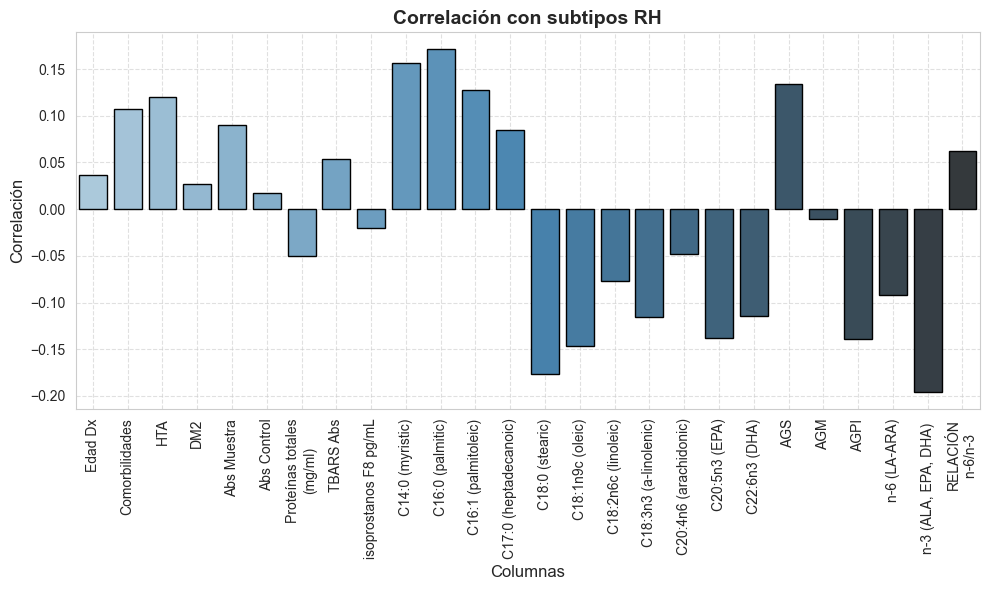

In [153]:
data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = df['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in [1, 2] else 2)

# Calcular la matriz de correlación
correlation_matrix = data.corr()


correlation_data = correlation_matrix['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].drop(['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']).reset_index()
correlation_data.columns = ['Columnas', 'Correlación']

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_data, x='Columnas', y='Correlación', palette='Blues_d', edgecolor='black')
plt.title('Correlación con subtipos RH', fontsize=14, fontweight='bold')
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Correlación', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\jor_x\AppData\Local\Temp\ipykernel_27952\741933814.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_data, x='Columnas', y='Correlación', palette='Blues_d', edgecolor='black')


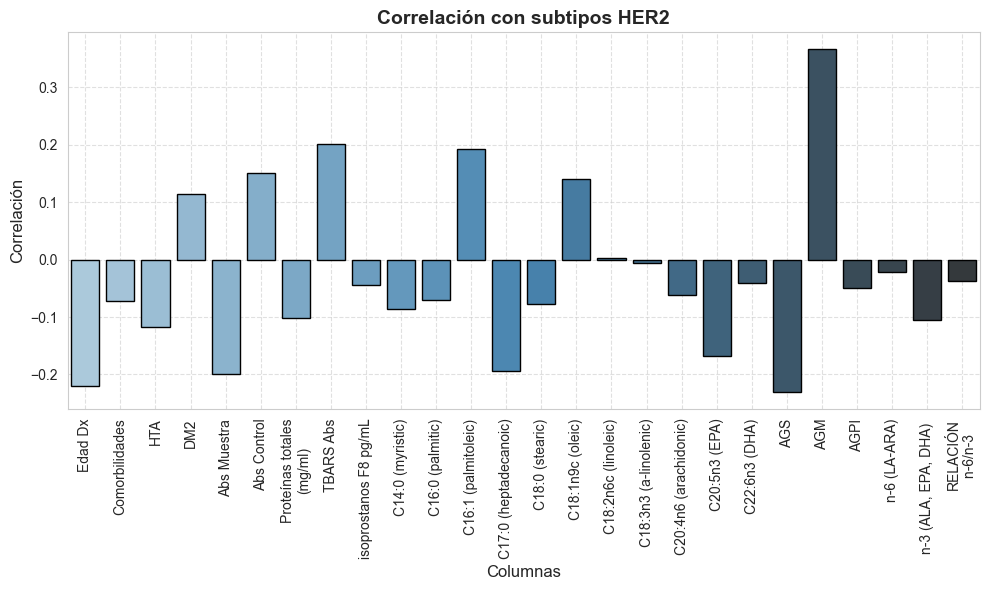

In [151]:
data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = df['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in [2, 3] else 2)

# Calcular la matriz de correlación
correlation_matrix = data.corr()


correlation_data = correlation_matrix['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].drop(['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']).reset_index()
correlation_data.columns = ['Columnas', 'Correlación']

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_data, x='Columnas', y='Correlación', palette='Blues_d', edgecolor='black')
plt.title('Correlación con subtipos HER2', fontsize=14, fontweight='bold')
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Correlación', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
from collections import Counter

tests = {'RH': (1, 2), 'HER2': (2, 3)}

# Lista de modelos a probar
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}


def is_balanced(y_test, threshold=0.2):
    """
    Verifica si el balance de clases en y_test es aceptable.
    threshold: porcentaje máximo de diferencia entre clases.
    """
    counts = Counter(y_test)
    total = sum(counts.values())
    ratios = [count / total for count in counts.values()]
    return max(ratios) - min(ratios) <= threshold



for clas, label in tests.items():
    # Crear un diccionario para almacenar las precisiones de cada modelo
    model_accuracies = {model_name: [] for model_name in models.keys()}
    # Diccionario para almacenar la mejor precisión de cada modelo
    best_accuracies = {model_name: 0 for model_name in models.keys()}
    for _ in range(100):
        # Modificar la columna objetivo según el test actual
        data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = df['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in label else 0)

        # Definir los datos y la variable objetivo
        y = data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']
        X = data.drop(columns=['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'])

        # Escalar los datos
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        n_components = 18  # Cambia este valor según el número de componentes deseado
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)

        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.35)

        # Verificar el balance de clases
        if not is_balanced(y_test):
            continue

        # Probar cada modelo
        for model_name, model in models.items():
            # Entrenar el modelo
            model.fit(X_train, y_train)

            # Predecir en el conjunto de prueba
            y_pred = model.predict(X_test)

            # Evaluar el modelo y almacenar la precisión
            accuracy = accuracy_score(y_test, y_pred)
            model_accuracies[model_name].append(accuracy)

            # Actualizar la mejor precisión si es mayor
            if accuracy > best_accuracies[model_name]:
                best_accuracies[model_name] = accuracy

    # Calcular y mostrar la precisión promedio de cada modelo para el test actual
    print(f"Resultados para el test {clas}:")
    for model_name, accuracies in model_accuracies.items():
        avg_accuracy = sum(accuracies) / len(accuracies) if accuracies else 0
        print(f"Modelo: {model_name}, Precisión promedio: {avg_accuracy:.4f}")
    print("-" * 25)

    # Mostrar las mejores precisiones de cada modelo
    print("Mejores precisiones de cada modelo:")
    for model_name, best_accuracy in best_accuracies.items():
        print(f"Modelo: {model_name}, Mejor Precisión: {best_accuracy:.4f}")
    print("-" * 50)

Resultados para el test RH:
Modelo: Logistic Regression, Precisión promedio: 0.4889
Modelo: Support Vector Machine (SVM), Precisión promedio: 0.5556
Modelo: K-Nearest Neighbors (KNN), Precisión promedio: 0.5280
Modelo: Random Forest, Precisión promedio: 0.5556
Modelo: Decision Tree, Precisión promedio: 0.5270
Modelo: Naive Bayes, Precisión promedio: 0.5005
-------------------------
Mejores precisiones de cada modelo:
Modelo: Logistic Regression, Mejor Precisión: 0.6296
Modelo: Support Vector Machine (SVM), Mejor Precisión: 0.5926
Modelo: K-Nearest Neighbors (KNN), Mejor Precisión: 0.6296
Modelo: Random Forest, Mejor Precisión: 0.6667
Modelo: Decision Tree, Mejor Precisión: 0.6667
Modelo: Naive Bayes, Mejor Precisión: 0.6667
--------------------------------------------------
Resultados para el test HER2:
Modelo: Logistic Regression, Precisión promedio: 0.6128
Modelo: Support Vector Machine (SVM), Precisión promedio: 0.5168
Modelo: K-Nearest Neighbors (KNN), Precisión promedio: 0.5410
Mo

Accuracy: 0.7916666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.94      0.79      0.86        19

    accuracy                           0.79        24
   macro avg       0.72      0.79      0.74        24
weighted avg       0.85      0.79      0.81        24



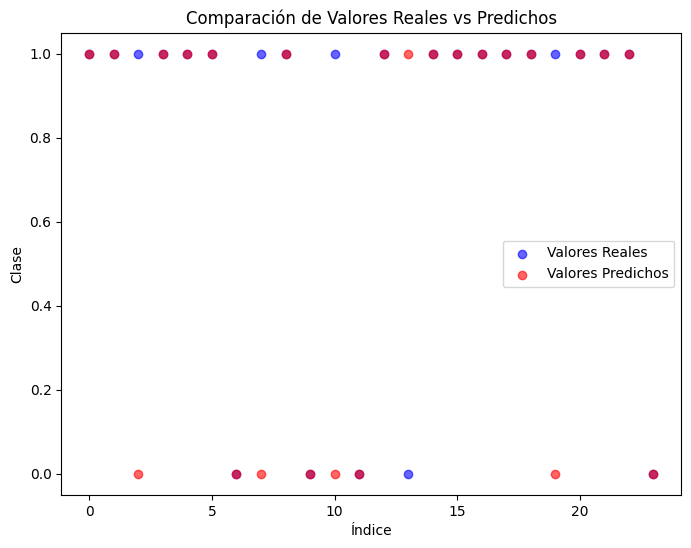

Accuracy: 0.5833333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.43      0.33      0.38         9

    accuracy                           0.58        24
   macro avg       0.54      0.53      0.53        24
weighted avg       0.57      0.58      0.57        24



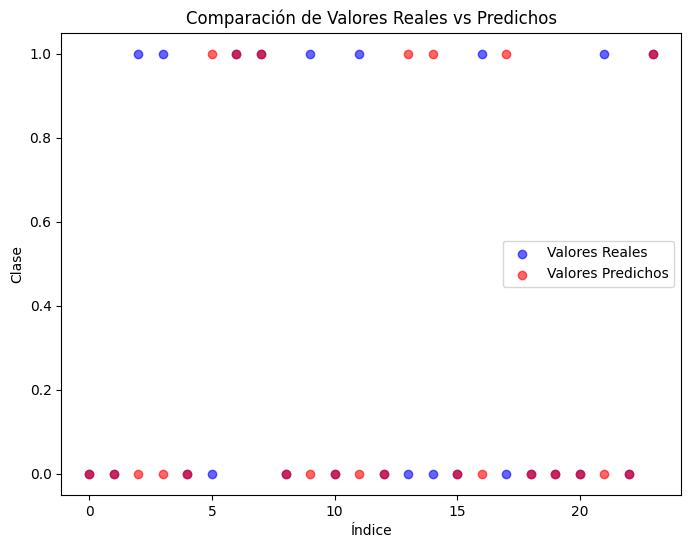

In [418]:
tests = [(1, 2), (2, 3)]

for test in tests:
    data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = df['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in test else 0)
    # Definir los datos y la variable objetivo
    y = data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']
    X = data.drop(columns=['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'])

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar PCA
    n_components = 20  # Cambia este valor según el número de componentes deseado
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

    # Crear el modelo de Random Forest
    rf_model = RandomForestClassifier()

    # Entrenar el modelo
    rf_model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_pca = rf_model.predict(X_test)

    # Evaluar el modelo
    print("Accuracy:", accuracy_score(y_test, y_pred_pca))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test.values, color='blue', label='Valores Reales', alpha=0.6)
    plt.scatter(range(len(y_pred_pca)), y_pred_pca, color='red', label='Valores Predichos', alpha=0.6)
    plt.title('Comparación de Valores Reales vs Predichos')
    plt.xlabel('Índice')
    plt.ylabel('Clase')
    plt.legend()
    plt.show()

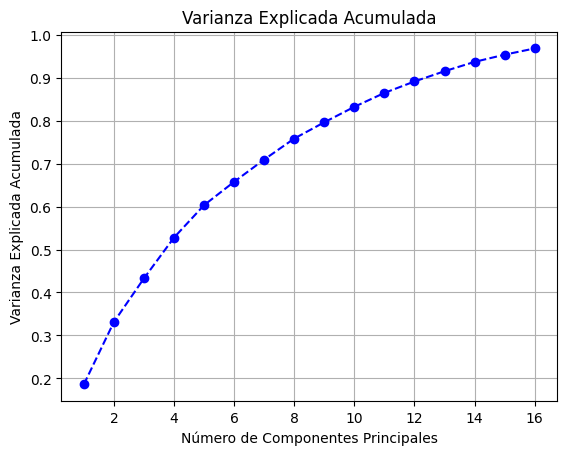

Varianza explicada por cada componente principal: [0.18589961 0.14529537 0.10163544 0.09490735 0.07550152 0.05444234
 0.05182625 0.04884148 0.03790475 0.03601621 0.03235594 0.02666657
 0.02386658 0.02170617 0.01682803 0.0145177 ]
Varianza total explicada: 0.9682113004257038


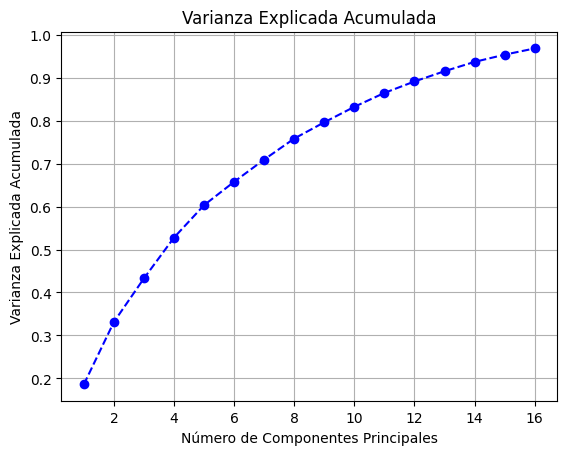

Varianza explicada por cada componente principal: [0.18589961 0.14529537 0.10163544 0.09490735 0.07550152 0.05444234
 0.05182625 0.04884148 0.03790475 0.03601621 0.03235594 0.02666657
 0.02386658 0.02170617 0.01682803 0.0145177 ]
Varianza total explicada: 0.9682113004257038


In [18]:
tests = [(1, 2), (2, 3)]

for test in tests:
    data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = df['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in test else 0)
    # Definir los datos y la variable objetivo
    y = data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']
    X = data.drop(columns=['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'])

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar PCA
    n_components = 16  # Cambia este valor según el número de componentes deseado
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Gráfico de varianza explicada acumulada
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
    plt.title('Varianza Explicada Acumulada')
    plt.xlabel('Número de Componentes Principales')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.grid()
    plt.show()

    # Revisar la varianza explicada
    print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)
    print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

In [213]:
lista = dict()

for i in range(1000):
    # Dividir los datos transformados por PCA en conjuntos de entrenamiento y prueba
    X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=i)

    # Crear un modelo de Random Forest
    rf_model_pca = RandomForestClassifier()

    # Entrenar el modelo con los datos transformados por PCA
    rf_model_pca.fit(X_pca_train, y_train_pca)
    
    y_pred_pca = rf_model_pca.predict(X_pca_test)
    if accuracy_score(y_test_pca, y_pred_pca) > 0.8 and accuracy_score(y_test_pca, y_pred_pca) not in lista.values():
        lista[i] = accuracy_score(y_test_pca, y_pred_pca)
        # Predecir en el conjunto de prueba
        # Evaluar el modelo
        print(f"Accuracy {i} con PCA:", accuracy_score(y_test_pca, y_pred_pca))

# plt.figure(figsize=(8, 6))
# plt.scatter(range(len(y_test_pca)), y_test_pca.values, color='blue', label='Valores Reales', alpha=0.6)
# plt.scatter(range(len(y_pred_pca)), y_pred_pca, color='red', label='Valores Predichos', alpha=0.6)
# plt.title('Comparación de Valores Reales vs Predichos')
# plt.xlabel('Índice')
# plt.ylabel('Clase')
# plt.legend()
# plt.show()